In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import file in Pandas Dataframe

In [2]:
df = pd.read_csv("dog_records.csv")
df.head()

,index,height,weight,gender
0,0,23.024551,30.861741,female
1,1,24.034770,28.137327,female
2,2,22.757153,20.223910,female
3,3,14.685089,18.998547,female
4,4,30.004165,27.738989,male


### 2. Relationship between height and weight

Text(0.5,1,'Linear relationship between Height and Weight')

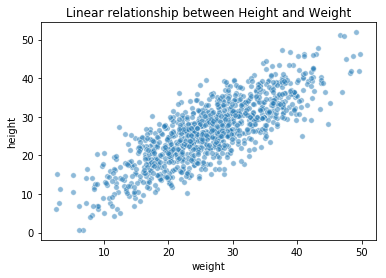

In [3]:
sns.scatterplot(x='weight', y='height', alpha=0.5, s=30, data=df)
plt.title('Linear relationship between Height and Weight')
#looks like there is a linear relationship between height and weight

### 3. Linear regression to predict Weight in terms of Height only

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.asarray(df.height).reshape(-1,1)
y = np.asarray(df.weight)

#Split Training and Test data in the ratio 70%:30% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Fit Linear Regression on Training Data
reg = LinearRegression().fit(X_train, y_train)

In [5]:
print("The Equation of the regression line is %1.4fX + %1.4f = 0"%(reg.coef_[0],reg.intercept_ )) 

The Equation of the regression line is 0.8237X + 4.7492 = 0


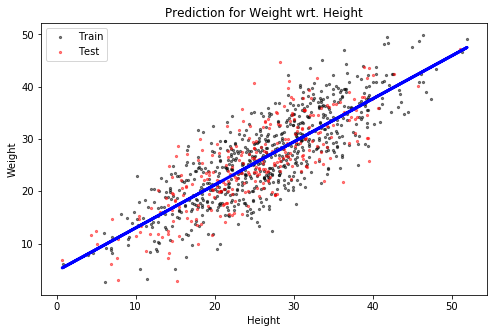

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X_train, y_train,  color='black', s=5, alpha=0.5, label='Train')
plt.scatter(X_test, y_test,  color='red', s=5, alpha=0.5, label='Test')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Prediction for Weight wrt. Height')
ax.legend()
# Plot Prediction for all of the dataset values
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.show()

Here Slope is 0.82 and Intercept is 4.75

In [7]:
print("Coeffecient of Determination(R^2) :", reg.score(X_test, y_test))

Coeffecient of Determination(R^2) : 0.649500405846017


In [8]:
yHat_test = reg.predict(X_test)
residuals = (y_test - yHat_test)

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yHat_test))
print("Root Mean Squared Error(RMSE): ", rmse)

Root Mean Squared Error(RMSE):  4.884501179100505


Text(0.5,1,'Plot of Residues')

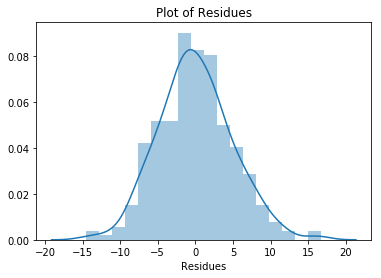

In [10]:
sns.distplot(residuals)
plt.xlabel("Residues")
plt.title("Plot of Residues")

First I split the dataset into train(70%) and test(30%) dataset and then train on the training dataset. In the diagram Prediction for Weight wrt. Height I have used the classifier to predict every value in the dataset.    

#### Analysis and Metrics:       
While determining whether the model is good enough to deploy we need to check multiple things as follows:     
1. <b>Coefficient of determination( R<sup>2</sup>):</b> We see that the R<sup>2</sup> values as 0.65, it explains how much of variability in the dependent parameter is explained by the independent parameter. If the values are low(<0.2) it shows that the variable does not describe the outcome satisfactorily. Similarly if the values are high(>0.8) indicates a high dependency      
2. <b>Root Mean Squared Error(RMSE):</b> RMSE gives the mean square root of squared difference of error. The RMSE value is around 4.9 which means that there is a mean difference of 4.9 units in the prediction which can either be less or more, considering the range of weight is from almost 2 to 50 units the difference seems ok. in the scatter plot we see that there are some outliers hence these outliers might affect the RMSE values. If we remove the outliers I am preety sure the values won't be that high.
3. <b>Normal Distribution of Residuals:</b> From the diagram we see that the plot of residual values is almost normally distributed for Test data with mean at 0, hence we can say that there is no bias in the model and large number of values have difference residual value close to 0 which is a good sign. 
4. <b>Checking Visual Fit for Regression line:</b> We see that the regression line satisfactorily fits the points in the scatter plot except few outliers hence we can say that the model has subsequently generalized.   

### 4. Check relationship between Height and Weight wrt. Gender

Text(0.5,1,'Linear relationship between Height and Weight wrt. Gender')

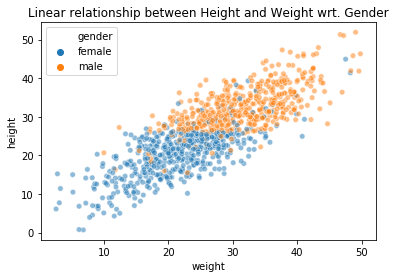

In [11]:
sns.scatterplot(x='weight', y='height', hue='gender', data=df, alpha=0.5, s=30)

plt.title('Linear relationship between Height and Weight wrt. Gender')

we see a clear distinction between the male and female gender in the scatter plot except few outliers. Generally the males tend to be on a higher end of height than that of females.

### 5. Test to check if the average weight of males is different from females

Text(0.5,1,'Comparison of Distributions')

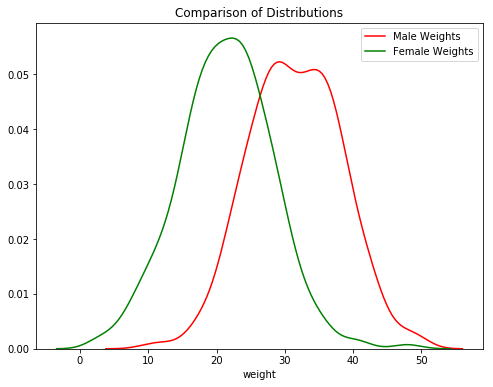

In [12]:
maleWeights = df[df.gender=='male'].weight
femaleWeights = df[df.gender=='female'].weight

plt.figure(figsize=(8, 6))

sns.distplot(maleWeights, hist=False, label="Male Weights", color='red')
sns.distplot(femaleWeights, hist=False, label="Female Weights", color='green')
plt.title('Comparison of Distributions')

In [13]:
maleWeights.var()

44.88774258143332

In [14]:
femaleWeights.var()

47.24512423377603

In [15]:
from scipy import stats
#Welch's two sample t-test
#Reference: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
(T, pval) = stats.ttest_ind(maleWeights,femaleWeights, equal_var=False)
pval

3.352913308759636e-98

In [16]:
meanDiff = maleWeights.mean() - femaleWeights.mean()
meanDiff

10.134919920768958

In [17]:
maleWeights.count()

482

In [18]:
femaleWeights.count()

518

In [19]:
from scipy.stats import t
import math
# 95% Confidence Interval
# Reference : https://en.wikipedia.org/wiki/Welch%27s_t-test for formula of df
degreeOfFreedom = (maleWeights.var()/482 + femaleWeights.var()/518)**2 / (((maleWeights.var()/482)**2/481) + ((femaleWeights.var()/518)**2/517) )
q = t.ppf([0.975], degreeOfFreedom)
se = math.sqrt(maleWeights.var() / maleWeights.count() + femaleWeights.var() / femaleWeights.count())

lower = meanDiff - q*se 
upper = meanDiff + q*se
print('The Weight of males is generally %1.4f to %1.4f higher than that of females (Mean 95 percent Confidence Interval)' %(lower, upper))

The Weight of males is generally 9.2924 to 10.9774 higher than that of females (Mean 95 percent Confidence Interval)


We see that the variance of male weights and female weights are not same and hence we cannot say for sure that the population variance of both the samples are same, hence we will do <b>Welch's two sample t-test</b>.      
The <b>prerequisites</b> for this test are the two populations have normal distributions with equal unequal variance, from the distribution plot we can say that the samples look as if the are drawn from a normal distribution with different variance.       

We formulate the <b>null hypothesis</b> as  :     
mean<sub>male</sub> = mean<sub>female</sub>     

We use We see that the P-value is almost 0 for the test hence we can say that the evidence are against the null hypothesis hence we can say that the two means are not equal.      
Also for this sample we see that the difference in the mean is 10.13 after getting the 95% Confidence Interval we can see that the lower bound of mean difference is 9.29 and the upper bound is 10.98

### 6.  Add Gender as a predictor variable

In [20]:
genderMap = {'male' : 1, 'female' : 0}
dfMapped = df
dfMapped.gender = dfMapped.gender.map(genderMap)

In [21]:
dfMapped.head()

,index,height,weight,gender
0,0,23.024551,30.861741,0
1,1,24.034770,28.137327,0
2,2,22.757153,20.223910,0
3,3,14.685089,18.998547,0
4,4,30.004165,27.738989,1


In [22]:
X1 = np.asarray(df[['height', 'gender']])
y1 = np.asarray(df.weight)

#Split Training and Test data in the ratio 70%:30% respectively
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=7)

# Fit Linear Regression on Training Data
reg1 = LinearRegression().fit(X_train1, y_train1)

In [23]:
print("The Equation of the regression line is [%1.4f, %1.4f]X + %1.2f = 0"%(reg1.coef_[0],reg1.coef_[1],reg1.intercept_ )) 

The Equation of the regression line is [0.8182, 0.1297]X + 4.83 = 0


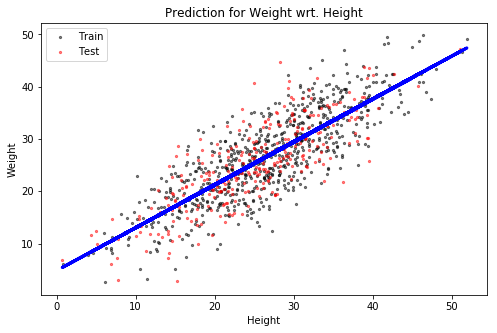

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X_train1[:,0], y_train1,  color='black', s=5, alpha=0.5, label='Train')
plt.scatter(X_test1[:,0], y_test1,  color='red', s=5, alpha=0.5, label='Test')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Prediction for Weight wrt. Height')
ax.legend()
# Plot Prediction for all of the dataset values
plt.plot(X1[:,0], reg1.predict(X1), color='blue', linewidth=3)
plt.show()

In [25]:
print("Coeffecient of Determination(R^2) :", reg1.score(X_test1, y_test1))

Coeffecient of Determination(R^2) : 0.6498029053347092


In [26]:
yHat_test1 = reg1.predict(X_test1)
residuals1 = (y_test1 - yHat_test1)

In [27]:
rmse = sqrt(mean_squared_error(y_test1, yHat_test1))
print("Root Mean Squared Error(RMSE): ", rmse)

Root Mean Squared Error(RMSE):  4.882392934077979


Text(0.5,1,'Plot of Residues')

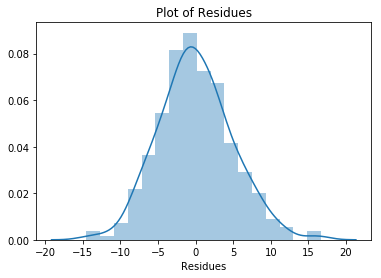

In [28]:
sns.distplot(residuals1)
plt.xlabel("Residues")
plt.title("Plot of Residues")

### 6a. Quality of Prediction :  
Similar to the first case I split the dataset into train(70%) and test(30%) dataset and then train on the training dataset. In the diagram Prediction for Weight wrt. Height I have used the classifier to predict every value in the dataset.    

Lets have a look if the model has become better after adding one more predictor variable.    

1. <b>Coefficient of determination( R<sup>2</sup>):</b> We see that the R<sup>2</sup> values  have slightly increased from 0.6495 to 0.6498 there is just a difference of 0.003      
2. <b>Root Mean Squared Error(RMSE):</b> RMSE values have also slightly reduced from 4.8845 to 4.8824 but the difference is very small.
3. <b>Normal Distribution of Residuals:</b> Here also we see similar characteristic of the residual curve hence the model is not biased and displays good fit characteristics. 
4. <b>Checking Visual Fit for Regression line:</b> In this case as well the regression line satisfactorily fits the points in the scatter plot except few outliers hence we can say that the model has subsequently generalized.

### 6b. Significant Predictor of Height:      
To get the significant predictor of height we will use weight and gender for training as follows

In [29]:
X2 = np.asarray(df[['weight', 'gender']])
y2 = np.asarray(df.height)
reg2 = LinearRegression().fit(X2, y2)

In [30]:
reg2.coef_

array([0.58600848, 6.23850462])

The coefficient Matrix shows that the Gender variable has the higher coefficient value than that for weight, Hence the <b>Gender</b> is more significant predictor for height